# Decision Tree Model Attempt

In [164]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [165]:
df.head()

,date,UBS_x,UBS Financial Services Inc.,UBS Investment Bank,UBS Global Wealth Management,UBS Asset Management,Open,High,Low,Close,Volume,Dividends,Stock Splits,UBS_y,Union Bank of Switzerland,UBS tax evasion controversies,Banking in Switzerland,dow_open,dow_high,dow_low,dow_close,dow_vol,nas_open,nas_high,nas_low,nas_close,nas_vol,Wiki_total,Google_total,Stock_total,Nas_total,Dow_total,Wiki_Moment_1,Wiki_Moment_2,Wiki_Moment_1_s,Wiki_Moment_2_s,Wiki_MAvg,Wiki_MAvg_s,Wiki_MAvg_s_5,Wiki_MAvg_s_6,Wiki_Disparity,Wiki_Disparity_s,Wiki_Disparity_s_5,Wiki_ROC,Wiki_ROC_s,Wiki_Rocp,Wiki_EMA,Wiki_EMA_5,Wiki_diff,Wiki_gain,Wiki_loss,Wiki_avg_gain,Wiki_avg_loss,Wiki_rs,Wiki_RSI,Stoch_Oscillator_3,Stoch_Oscillator_14,Change_Close,Change_Google,Wiki_Move,Wiki_MAvg_Move,Wiki_MAvg_s_Move,Wiki_ROC_Move,Wiki_EMA_Move,Wiki_EMA_Move_5,Wiki_Disparity_Move,Wiki_Disparity_s_Move,Wiki_RSI_Move,Google_Moment_1,Google_Moment_2,Google_Moment_1_s,Google_Moment_2_s,Google_MAvg,Google_MAvg_s,Google_MAvg_s_5,Google_MAvg_s_6,Google_Disparity,Google_Disparity_s,Google_Disparity_s_5,Google_ROC,Google_ROC_s,Google_Rocp,Google_EMA,Google_EMA_5,Google_diff,Google_gain,Google_loss,Google_avg_gain,Google_avg_loss,Google_rs,Google_RSI,Google_Move,Google_MAvg_Move,Google_MAvg_s_Move,Google_ROC_Move,Google_EMA_Move,Google_EMA_Move_5,Google_Disparity_Move,Google_Disparity_s_Move,Google_RSI_Move,Stock_Moment_1,Stock_Moment_2,Stock_Moment_1_s,Stock_Moment_2_s,Stock_MAvg,Stock_MAvg_s,Stock_MAvg_s_5,Stock_MAvg_s_6,Stock_Disparity,Stock_Disparity_s,Stock_Disparity_s_5,Stock_ROC,Stock_ROC_s,Stock_Rocp,Stock_EMA,Stock_EMA_5,Stock_diff,Stock_gain,Stock_loss,Stock_avg_gain,Stock_avg_loss,Stock_rs,Stock_RSI,Stock_Move,Stock_MAvg_Move,Stock_MAvg_s_Move,Stock_ROC_Move,Stock_EMA_Move,Stock_EMA_Move_5,Stock_Disparity_Move,Stock_Disparity_s_Move,Stock_RSI_Move,Nas_Moment_1,Nas_Moment_2,Nas_Moment_1_s,Nas_Moment_2_s,Nas_MAvg,Nas_MAvg_s,Nas_MAvg_s_5,Nas_MAvg_s_6,Nas_Disparity,Nas_Disparity_s,Nas_Disparity_s_5,Nas_ROC,Nas_ROC_s,Nas_Rocp,Nas_EMA,Nas_EMA_5,Nas_diff,Nas_gain,Nas_loss,Nas_avg_gain,Nas_avg_loss,Nas_rs,Nas_RSI,Nas_Move,Nas_MAvg_Move,Nas_MAvg_s_Move,Nas_ROC_Move,Nas_EMA_Move,Nas_EMA_Move_5,Nas_Disparity_Move,Nas_Disparity_s_Move,Nas_RSI_Move,Dow_Moment_1,Dow_Moment_2,Dow_Moment_1_s,Dow_Moment_2_s,Dow_MAvg,Dow_MAvg_s,Dow_MAvg_s_5,Dow_MAvg_s_6,Dow_Disparity,Dow_Disparity_s,Dow_Disparity_s_5,Dow_ROC,Dow_ROC_s,Dow_Rocp,Dow_EMA,Dow_EMA_5,Dow_diff,Dow_gain,Dow_loss,Dow_avg_gain,Dow_avg_loss,Dow_rs,Dow_RSI,Dow_Move,Dow_MAvg_Move,Dow_MAvg_s_Move,Dow_ROC_Move,Dow_EMA_Move,Dow_EMA_Move_5,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_1,target_2,target_3,target_4,target_5
0,2019-01-04,14.791667,0.0,0.0,0.0,0.0,10.734068,10.937397,10.687472,10.878093,2743500.0,0.0,0.0,1467,125,29,398,22894.919922,23518.640625,22894.919922,23433.160156,396020000,6567.140137,6760.689941,6554.240234,6738.859863,2579550000,566.791667,1467.0,10.878093,6738.859863,23433.160156,NaN,NaN,NaN,NaN,562.069444,562.069444,562.069444,562.069444,100.840149,100.840149,100.840149,NaN,NaN,NaN,562.069444,NaN,-0.916667,0.00,-0.92,NaN,NaN,NaN,NaN,NaN,NaN,0.110136,550.0,0,1,1,0,1,1,0,0,0,NaN,NaN,NaN,NaN,1475.000000,1475.000000,1475.000000,1475.00,99.457627,99.457627,99.457627,NaN,NaN,NaN,1475.000000,NaN,-89.0,0.0,-89.0,NaN,NaN,NaN,NaN,0,0,0,0,1,1,0,0,0,NaN,NaN,NaN,NaN,10.669115,10.669115,10.669115,10.669115,101.958713,101.958713,101.958713,NaN,NaN,NaN,10.669115,NaN,0.381243,0.38,0.00,NaN,NaN,NaN,NaN,1,1,1,0,1,1,1,1,0,NaN,NaN,NaN,NaN,6622.766602,6622.766602,6622.766602,6622.766602,101.752942,101.752942,101.752942,NaN,NaN,NaN,6622.766602,NaN,275.359863,275.36,0.0,NaN,NaN,NaN,NaN,1,1,1,0,1,1,1,1,0,NaN,NaN,NaN,NaN,23155.207031,23155.207031,23155.207031,23155.207031,101.200391,101.200391,101.200391,NaN,NaN,NaN,23155.207031,NaN,746.939453,746.94,0.0,NaN,NaN,NaN,NaN,1,1,1,0,1,1,1,1,0,0,1,1,1,1
1,2019-01-07,12.208333,0.0,0.0,0.0,0.0,10.878092,11.056005,10.823024,10.988229,3163300.0,0.0,0.0,2017,130,37,418,23474.259766,2368

In [166]:
# df_1, Basic Varaibles,  
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_1"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_1
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,0
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,1
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,1
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,0


In [167]:
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_1
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,0
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,1
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,1
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,0


# Train/test split

In [168]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [169]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [170]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [171]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_1
0    289
1    358
Name: target_1, dtype: int64


# Feature scaling

In [172]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [173]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [174]:
corr_matrix

,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14
Change_Close,1.000000,-0.009718,-0.012581,-0.003452,-0.006789,-0.063188,0.006038,0.023984,-0.004001,-0.064745,-0.024400,0.039585,-0.073265,0.032847,0.016986
Wiki_Move,-0.009718,1.000000,0.143883,0.580469,-0.109910,-0.011054,0.220593,0.248495,0.181962,0.052446,0.534253,-0.016467,-0.010847,0.291800,0.004900
Wiki_EMA_5,-0.012581,0.143883,1.000000,0.317211,-0.170930,0.305746,0.086264,0.019370,0.038992,0.009020,0.284931,-0.061775,0.296428,0.034500,0.020886
Wiki_Disparity_s_5,-0.003452,0.580469,0.317211,1.000000,-0.208419,-0.020347,0.226263,0.181437,0.151783,0.038917,0.855821,-0.058809,-0.039450,0.271800,-0.015640
Change_Google,-0.006789,-0.109910,-0.170930,-0.208419,1.000000,-0.330364,-0.282901,-0.117409,-0.136645,-0.060137,-0.194767,0.045568,-0.280956,-0.190192,-0.001569
Google_MAvg_s_5,-0.063188,-0.011054,0.305746,-0.020347,-0.330364,1.000000,0.096574,-0.060051,-0.060809,0.015602,-0.019754,-0.007522,0.956059,-0.078726,-0.093659
Google_EMA_Move_5,0.006038,0.220593,0.086264,0.226263,-0.282901,0.096574,1.000000,0.278425,0.302042,0.048755,0.185318,-0.058177,0.055217,0.467856,-0.019753
Google_Disparity_s_Move,0.023984,0.248495,0.019370,0.181437,-0.117409,-0.060051,0.278425,1.000000,0.455061,-0.063050,0.197788,-0.056768,-0.027353,0.754965,0.005986
Google_ROC_Move,-0.004001,0.181962,0.038992,0.151783,-0.136645,-0.060809,0.302042,0.455061,1.000000,-0.024579,0.177994,0.012195,-0.069431,0.508657,0.001022
Google_RSI_Move,-0.064745,0.052446,0.009020,0.038917,-0.060137,0.015602,0.048755,-0.063050,-0.024579,1.000000,0.007696,0.016483,0.022900,-0.068758,0.002133


In [175]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

In [176]:
feature_target_corr

Change_Close               0.571618
Change_Google              0.036075
Wiki_EMA_5                 0.030145
Google_EMA_Move_5          0.006711
Google_MAvg_s_6            0.001916
Stoch_Oscillator_14       -0.004998
Stock_RSI_Move            -0.008066
Google_MAvg_s_5           -0.011844
Wiki_Disparity_s_5        -0.035272
Wiki_Move                 -0.044492
Wiki_Disparity_s          -0.051630
Google_Move               -0.053543
Google_ROC_Move           -0.056730
Google_RSI_Move           -0.070919
Google_Disparity_s_Move   -0.087331
dtype: float64

# Select features based on correlation

In [177]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Disparity_s_5
Removed from list of features: Wiki_Move
Removed from list of features: Google_MAvg_s_6
Removed from list of features: Google_Move


In [192]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [193]:
X_train_tr.head()

,Change_Close,Wiki_EMA_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Stoch_Oscillator_14
0,0.622291,NaN,0.546986,0.175498,1.0,0.0,0.0,0.0,0.334803,0.0,NaN
1,0.584052,NaN,0.433109,0.298008,1.0,1.0,0.0,0.0,0.328661,0.0,NaN
2,0.557286,NaN,0.427248,0.391036,1.0,1.0,0.0,0.0,0.336008,0.0,NaN
3,0.626115,0.161776,0.435203,0.497410,1.0,0.0,0.0,0.0,0.319567,0.0,NaN
4,0.603172,0.157640,0.350632,0.497908,1.0,1.0,0.0,0.0,0.301143,0.0,NaN


### There is a problem of NaNs

In [194]:
pd.DataFrame(X_train_tr.isna().sum()).T

,Change_Close,Wiki_EMA_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Stoch_Oscillator_14
0,0,26,19,15,0,0,0,0,18,0,15


### Cheap solution for NaN --> Must come back

In [214]:
# This fixes the NaN issue that comes up later in the PCA
#X_train_tr = np.nan_to_num(X_train_tr)

X_train_tr = X_train_tr.fillna(X_train_tr.mean())
X_test_tr = X_test_tr.fillna(X_test_tr.mean())


In [215]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

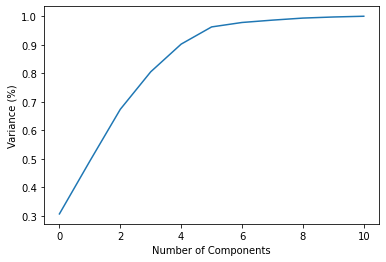

In [216]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [217]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [218]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [207]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [208]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.173913  0.324324  0.226415   37.000000
be long        0.731183  0.544000  0.623853  125.000000
accuracy       0.493827  0.493827  0.493827    0.493827
macro avg      0.452548  0.434162  0.425134  162.000000
weighted avg   0.603905  0.493827  0.533080  162.000000



### Tree diagram

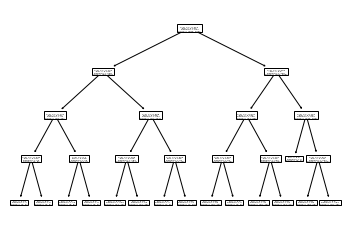

In [209]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots()
plot_tree(model, ax = plt.axes())
plt.show()

### Evaluate model and print metrics

In [219]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [220]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      64.760433  49.382716
Precision     63.319672  54.400000
Recall        86.312849  73.118280
F1 Score      73.049645  62.385321
